# STARBUCKS CA SHOP REVIEW EDA

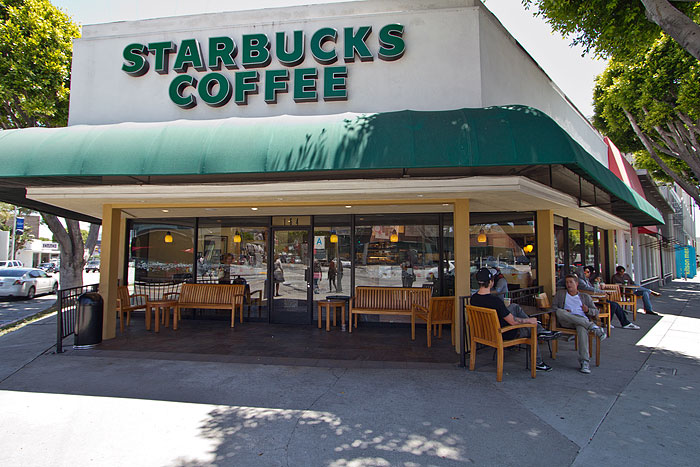

In [1]:
from PIL import Image
Image.open("CAFE.jpg")

Starbucks Corporation is a well-known American multinational chain of coffeehouses and roastery reserves, with more than 80,000 stores worldwide. Despite being famous, apparently it suffers low rating reviews from customers in some areas, which needs to be addressed as soon as possible.

This notebook's goal is to use Word Cloud and other text analysis tools to analyze customer reviews of various Starbucks shops in order to identify things that need improvement.

The data can be downloaded at https://www.kaggle.com/datasets/harshalhonde/starbucks-reviews-dataset

In [2]:
# Import Library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('reviews_data.csv')
df

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...,['No Images']
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text,['No Images']
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL...",['No Images']
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text,['No Images']


In [4]:
df.drop(['Image_Links'],axis=1, inplace=True)
df

,name,location,Date,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...
845,Becky,"Agoura Hills, CA","Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...
846,Bob,"Goodrich, MI","Reviewed Jan. 3, 2005",NaN,No Review Text
847,Erik,"Valley Village, CA","Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."
848,Andrew,"Fallbrook, CA","Reviewed Oct. 20, 2004",NaN,No Review Text


In [5]:
df.nunique()

name        604
location    633
Date        741
Rating        5
Review      814
dtype: int64

There are 633 unique locations. We are adding "state" columns in order to cluster these many locations better to see if we are capable of adding extra insights.

In [6]:
# Adding "State" columns

df['State']=None
df=df.reindex(['name','location','State','Date','Rating','Review'], axis=1)
df

,name,location,State,Date,Rating,Review
0,Helen,"Wichita Falls, TX",None,"Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",None,"Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",None,"Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",None,"Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",None,"Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA",None,"Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...
846,Bob,"Goodrich, MI",None,"Reviewed Jan. 3, 2005",NaN,No Review Text
847,Erik,"Valley Village, CA",None,"Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."
848,Andrew,"Fallbrook, CA",None,"Reviewed Oct. 20, 2004",NaN,No Review Text


In [7]:
df['State']=df['location'].str.rsplit(',').str[-1] 

In [8]:
df

,name,location,State,Date,Rating,Review
0,Helen,"Wichita Falls, TX",TX,"Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL",FL,"Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA",PA,"Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA",WA,"Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR",OR,"Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...
...,...,...,...,...,...,...
845,Becky,"Agoura Hills, CA",CA,"Reviewed July 13, 2006",NaN,I ordered two venti frappacino's without whipp...
846,Bob,"Goodrich, MI",MI,"Reviewed Jan. 3, 2005",NaN,No Review Text
847,Erik,"Valley Village, CA",CA,"Reviewed Nov. 5, 2004",NaN,"DEMANDED TIPS FROM ME, THEN MADE ME WAIT UNTIL..."
848,Andrew,"Fallbrook, CA",CA,"Reviewed Oct. 20, 2004",NaN,No Review Text


In [9]:
df['State'].values

array([' TX', ' FL', ' PA', ' WA', ' OR', ' TX', ' FL', ' NC', ' MD',
       ' Other', ' CA', ' OH', ' CA', ' HI', ' NJ', ' GA', ' Other',
       ' DC', ' GA', ' Other', ' TX', ' AZ', ' CA', ' MA', ' FL', ' TX',
       ' CA', ' Other', ' Other', ' MD', ' NJ', ' CA', ' VA', ' NV',
       ' TN', ' PA', ' TX', ' IA', ' NC', ' Other', ' OR', ' GA', ' CA',
       ' CA', ' NJ', ' NC', ' WI', ' NH', ' AR', ' CA', ' AR', ' MN',
       ' Other', ' FL', ' TX', ' OH', ' VA', ' TN', ' IN', ' MO', ' GA',
       ' CA', ' VA', ' AZ', ' IL', ' MI', ' FL', ' GA', ' TX', ' MN',
       ' WA', ' CA', ' MS', ' CO', ' Other', ' Other', ' PA', ' TX',
       ' Other', ' OK', ' NC', ' PA', ' Other', ' NC', ' Other', ' Other',
       ' TX', ' GA', ' OR', ' MO', ' Other', ' Other', ' FL', ' IN',
       ' UT', ' NJ', ' KY', ' PA', ' CO', ' NV', ' FL', ' MD', ' AZ',
       ' NJ', ' CO', ' CA', ' ME', ' KS', ' ON', ' Other', ' GA',
       ' Other', ' ON', ' VA', ' FL', ' NJ', ' PA', ' FL', ' TX', ' NC',
       ' MN

The state values here are not really cleaned up yet. There are uppercase and lowercase values, and there are state values that are not abbreviated yet. Let's clean it up.

In [10]:
# Cleaning up "State" values

df['State']=df['State'].str.upper()
df['State']=df['State'].str.strip()
df['State'] = df['State'].replace(['UNITED KINGDOM'], 'UK')
df['State'] = df['State'].replace(['CALIFORNIA'], 'CA')
df['State'] = df['State'].replace(['SASKATCHEWAN'], 'SK')
df['State'] = df['State'].replace(['WYOMING'], 'WY')
df['State'] = df['State'].replace(['SOUTH CAROLINA'], 'SC')
df['State'] = df['State'].replace(['VIRGINIA'], 'VA')
df['State'] = df['State'].replace(['MINNESOTA'], 'MN')
df['State'] = df['State'].replace(['ALBERTA'], 'AB')                         
df['State'] = df['State'].replace(['ALA'], 'AL')                                  
df['State'] = df['State'].replace(['NEW YORK'], 'NY') 
df['State'] = df['State'].replace(['MAINE'], 'ME') 
df['State'] = df['State'].replace(['COLORADO'], 'CO') 
df['State'] = df['State'].replace(['MICHIGAN'], 'MI') 
df['State'] = df['State'].replace(['NO OTHER LINE NEEDED'], 'OTHER') 
df['State'] = df['State'].replace(['BECCLES'], 'OTHER') 
df['State'] = df['State'].replace(['FLORIDA'], 'FL') 
df['State'] = df['State'].replace(['WI.'], 'WI') 

In [11]:
df['State'].values

array(['TX', 'FL', 'PA', 'WA', 'OR', 'TX', 'FL', 'NC', 'MD', 'OTHER',
       'CA', 'OH', 'CA', 'HI', 'NJ', 'GA', 'OTHER', 'DC', 'GA', 'OTHER',
       'TX', 'AZ', 'CA', 'MA', 'FL', 'TX', 'CA', 'OTHER', 'OTHER', 'MD',
       'NJ', 'CA', 'VA', 'NV', 'TN', 'PA', 'TX', 'IA', 'NC', 'OTHER',
       'OR', 'GA', 'CA', 'CA', 'NJ', 'NC', 'WI', 'NH', 'AR', 'CA', 'AR',
       'MN', 'OTHER', 'FL', 'TX', 'OH', 'VA', 'TN', 'IN', 'MO', 'GA',
       'CA', 'VA', 'AZ', 'IL', 'MI', 'FL', 'GA', 'TX', 'MN', 'WA', 'CA',
       'MS', 'CO', 'OTHER', 'OTHER', 'PA', 'TX', 'OTHER', 'OK', 'NC',
       'PA', 'OTHER', 'NC', 'OTHER', 'OTHER', 'TX', 'GA', 'OR', 'MO',
       'OTHER', 'OTHER', 'FL', 'IN', 'UT', 'NJ', 'KY', 'PA', 'CO', 'NV',
       'FL', 'MD', 'AZ', 'NJ', 'CO', 'CA', 'ME', 'KS', 'ON', 'OTHER',
       'GA', 'OTHER', 'ON', 'VA', 'FL', 'NJ', 'PA', 'FL', 'TX', 'NC',
       'MN', 'AZ', 'FL', 'MD', 'TX', 'MA', 'KY', 'MI', 'OR', 'NJ', 'BC',
       'AZ', 'KY', 'IN', 'NY', 'WI', 'OR', 'TX', 'NE', 'WI', 'AR', 'PA',

In [12]:
df.nunique()

name        604
location    633
State        59
Date        741
Rating        5
Review      814
dtype: int64

The "State" values now look good. We managed to trim down the unique values to 59 states rather than 633 unique locations. We will base our analysis on states.

Aside from location, the review date values in the "Date" column don't look right either. We need to remove the "Reviewed" string so we can get the actual date for better and easier analysis later.

In [13]:
# Correct the "Date" values

for i in df.index:
    df['Date'][i] = df['Date'][i][9:]

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.dtypes

name                object
location            object
State               object
Date        datetime64[ns]
Rating             float64
Review              object
dtype: object

"Date" column look good for now.

There are "No Review Text" values in the "Review" column too. We will change them into NaN values so we can remove it later. We don't need data that doesn't have review text.

In [16]:
df=df.replace('No Review Text',np.nan)

<Axes: >

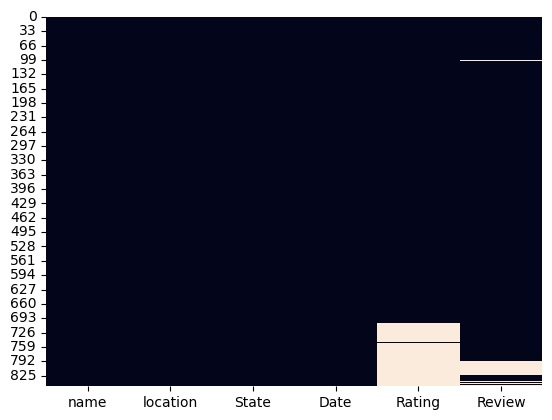

In [17]:
# Check missing values

sns.heatmap(df.isnull(), cbar=False)

In [18]:
# Drop missing values

df=df.dropna()

In [19]:
print(df.isna().sum())
print()
print(df.shape)
print()
print(df.nunique())

name        0
location    0
State       0
Date        0
Rating      0
Review      0
dtype: int64

(703, 6)

name        525
location    536
State        59
Date        608
Rating        5
Review      703
dtype: int64


# Rating Distribution

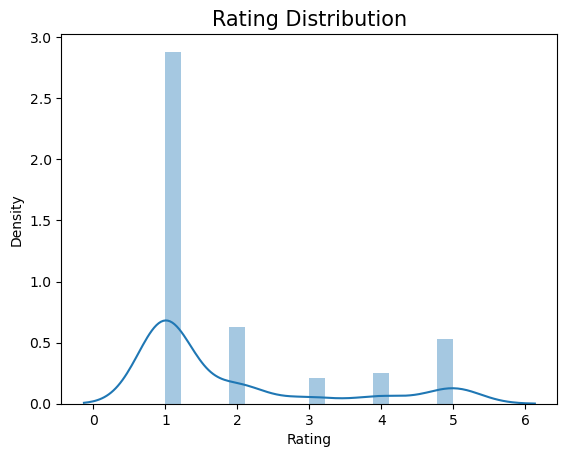

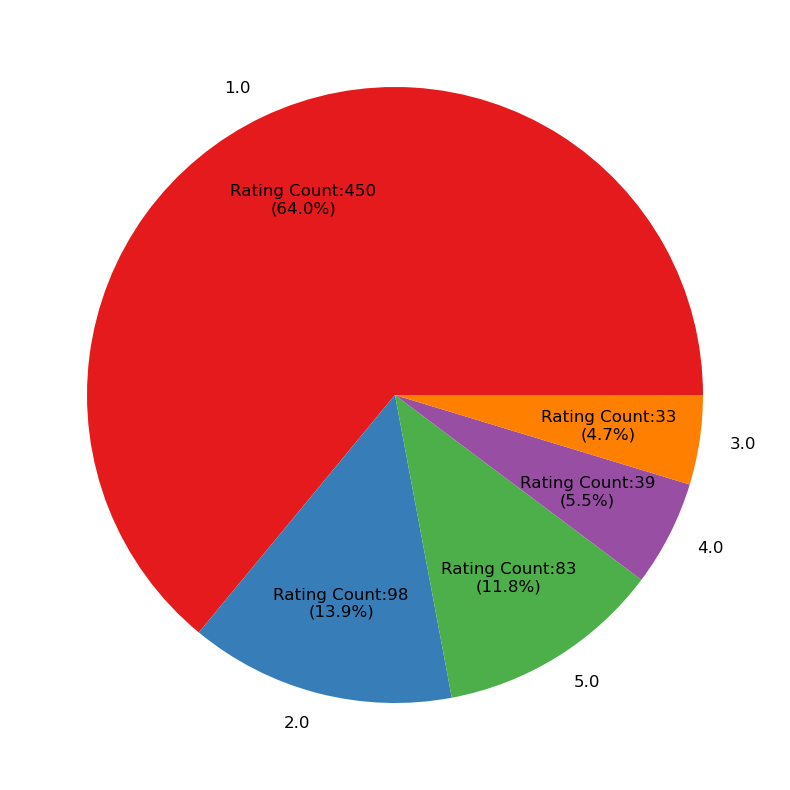

In [20]:
sns.distplot(df['Rating'])
plt.title ('Rating Distribution', size = 15)
plt.show()


def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = round((pct*total/100.0),2)
            return 'Rating Count:{v:.0f}\n({:.1f}%)'.format(pct, v=val)
        return my_format
plt.figure(figsize=(10,10))
plt.pie(df['Rating'].value_counts(),autopct=autopct_format(df['Rating'].value_counts()),
        labels=df['Rating'].value_counts().index, textprops={'fontsize': 12},
        colors=sns.color_palette('Set1'),pctdistance=0.7)

plt.show()

As we can see, the rating distribution is quite appalling, with 77.9% being negative reviews (1-2 star rating) from the customers. This is the problem that needs to be addressed as soon as possible.

## By State

In [21]:
# Store count and average rating by states

dfrating=df.groupby('State')['Rating'].agg(Count='size', Average_Rating='mean').reset_index()
dfrating=dfrating.sort_values(['Count','Average_Rating'],ascending=False).reset_index(drop=True)
dfrating.index=dfrating.index+1
dfrating.head(20)

,State,Count,Average_Rating
1,CA,147,1.857143
2,OTHER,42,1.976190
3,FL,42,1.857143
4,TX,37,2.054054
5,WA,34,1.647059
6,NY,32,1.625000
7,NC,23,1.608696
8,GA,23,1.478261
9,AZ,22,1.909091
10,IL,21,1.809524


In line with the general rating distribution data, all of the stores average rating values are hovering around 1 to 2. State with the most stores available are California (CA) and Florida (FL).

In [22]:
# Rating distribution by states

pvrating = pd.pivot_table(df,index=['State'],columns=['Rating'], aggfunc={'Rating': 'count'})
pvrating=pvrating.fillna(value=0).astype(int)
pvrating.style.background_gradient(axis=1)

Most of the stores get negative reviews too, as we can see from the table, no matter where their location is, with the exception of AL, MN, MS, RI, ND, NS, WV, and WY. But all of those states have very small sample sizes. The main states with the most stores, like CA and FL, got overwhelmingly large negative reviews compared to the positive ones, in line with the population.

## By Year

Count of Reviews by Year
2010      1
2011     21
2012     52
2013     24
2014     64
2015     90
2016     60
2017    124
2018     55
2019     55
2020     32
2021     33
2022     53
2023     39
Name: Date, dtype: int64


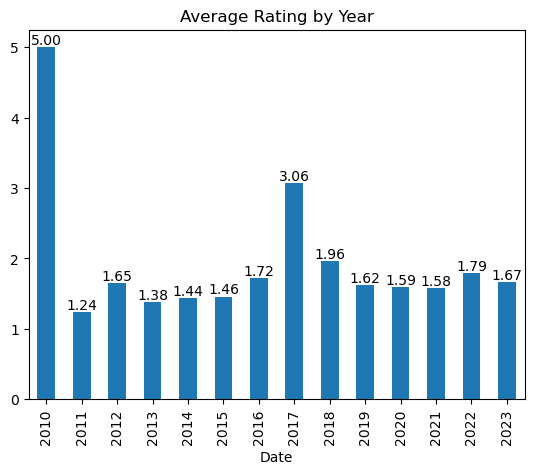

In [23]:
dfcdate=df.groupby(df['Date'].dt.year)['Rating'].agg(Average_Rating='mean').reset_index()
ax=dfcdate.plot(kind='bar', x='Date',y='Average_Rating', legend=None)
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.2f')
plt.title('Average Rating by Year')
print("Count of Reviews by Year")
print(df['Date'].dt.year.value_counts().sort_index())
plt.show()

Most of the years, the average rating is still hovering around 1,2 - 1,9, except for 2010 and 2017. In 2010, despite the average rating being a perfect 5, there is only one review, so we can't use this value as a basis for analysis. 2017, however, is interesting, as the average rating is around 3.

# Text Preprocessing

We will begin the text preprocessing technique before we go to the text analysis. We will convert the letters into lowercase, expand contractions, remove numbers, remove punctuation, add stopwords, and lemmatize the texts.

Stop words are commonly used words that have very little meaning, such as “a,” “an,” “the,” or “in.” Stopwords are typically excluded from natural language processing (NLP) and information retrieval applications because they do not contribute much to the meaning or context of the text. (https://medium.com/@neri.vvo/stop-words-removal-explained-top-3-easy-ways-to-implement-in-python-9bd273bd9c95)

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma. As such, lemmatization has a greater accuracy. (https://www.datacamp.com/tutorial/stemming-lemmatization-python)

In [24]:
def to_lower(text):
    return text.lower()

In [25]:
import re

In [26]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [27]:
def expand_contraction(text, contraction_dict):
    contraction_pattern= re.compile('({})'.format('|'.join(contraction_dict.keys())), flags= re.IGNORECASE | re.DOTALL)
    
    def expand_match(contraction):
        match= contraction.group(0)
        first_char= match[0]
        expanded_contraction= contraction_dict.get(match) \
            if contraction_dict.get(match) \
            else contraction_dict.get(match.lower())
        expanded_contraction= expanded_contraction
        return expanded_contraction
        
    expanded_text= contraction_pattern.sub(expand_match, text)
    expanded_text= re.sub("'","", expanded_text)
    return expanded_text

def main_contraction(text):
    text= expand_contraction(text, contractions_dict)
    return text

In [28]:
def remove_number(text):
    output=''.join(c for c in text if not c.isdigit())
    return output

In [29]:
from string import punctuation

In [30]:
def remove_punct(text):
    return "".join(c for c in text if c not in punctuation)

In [31]:
def to_strip(text):
    return " ".join(text.split())

In [32]:
import nltk
from nltk.corpus import stopwords

In [33]:
def remove_stopwords(text):
    stop_words= stopwords.words('english')
    stop_words.extend(["starbucks"])
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [34]:
df['prep1']=df['Review'].apply(to_lower)
df['prep2']=df['prep1'].apply(main_contraction)
df['prep3']=df['prep2'].apply(remove_number)
df['prep4']=df['prep3'].apply(remove_punct)
df['prep5']=df['prep4'].apply(to_strip)
df['prep6']=df['prep5'].apply(remove_stopwords)

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
word_net=WordNetLemmatizer()
def word_net_lemma(text):
    lemmatized_words= [word_net.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemmatized_words)

In [37]:
df['lemma']=df['prep6'].apply(word_net_lemma)

# Word Cloud & NGrams

Once we're done with the text preprocessing, we will use Word Cloud and Ngrams as methods to analyze customer reviews.

In [38]:
from wordcloud import WordCloud

def plot_cloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis('off')

In [39]:
from nltk import ngrams
from collections import Counter
from itertools import chain

def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

df['bigrams'] = df['lemma'].map(lambda x: find_ngrams(x.split(" "), 2))
df['trigrams'] = df['lemma'].map(lambda x: find_ngrams(x.split(" "), 3))

# Reference: https://stackoverflow.com/questions/48331315/how-to-extract-all-the-ngrams-from-a-text-dataframe-column-in-different-order-in

## Review EDA

In [40]:
df_negative=df[df['Rating']<3]
df_positive=df[df['Rating']>3]

Text(0.5, 1.0, 'Positive Reviews Word Cloud')

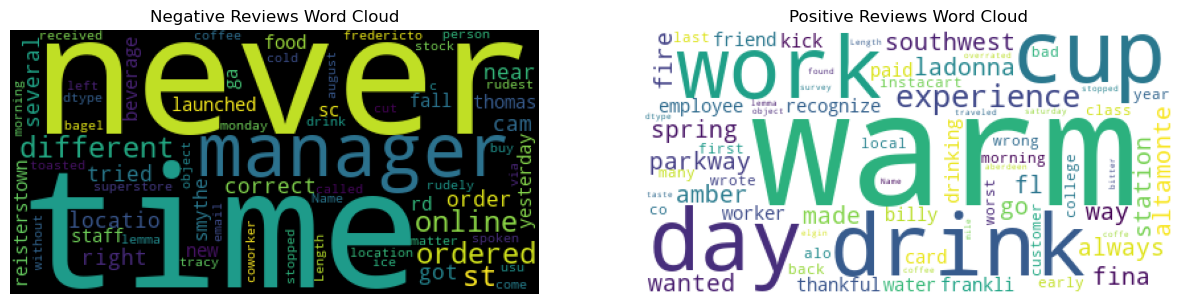

In [41]:
plt.figure(figsize=(15, 12))

plt.subplot(1,2,1)
word_cloud1= WordCloud().generate(str(df_negative['lemma']))
plot_cloud(word_cloud1)
plt.title('Negative Reviews Word Cloud')

plt.subplot(1,2,2)
word_cloud2= WordCloud(background_color='white').generate(str(df_positive['lemma']))
plot_cloud(word_cloud2)
plt.title('Positive Reviews Word Cloud')

The negative word cloud yields several terms such as "time", "never", "manager", and "online". While we can draw premature conclusions from these words, it is still too incoherent and indecisive. 

From the positive word cloud, we get words like warm, day, drink, cup, and work. It is very likely that customers appreciate the coffee's quality from these words, but it is still too indecisive.

From word cloud, we move to bigrams and trigrams analysis to get a better picture of the reviews.

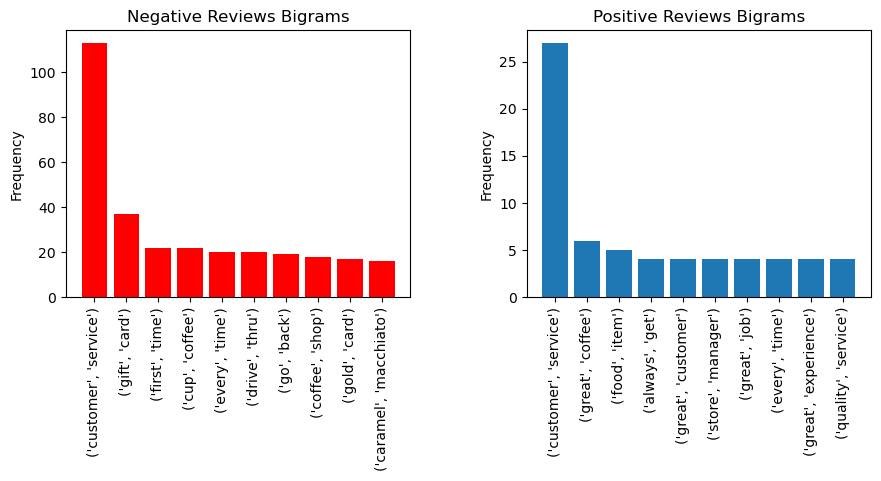

In [42]:
# Bigrams

bigrams1 = df_negative['bigrams'].tolist()
bigrams1 = list(chain(*bigrams1))
bigrams1_counts = Counter(bigrams1)

bigrams2 = df_positive['bigrams'].tolist()
bigrams2 = list(chain(*bigrams2))
bigrams2_counts = Counter(bigrams2)

plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
bigrams1x=list(map(str,(dict(bigrams1_counts.most_common(10)).keys())))
bigrams1y=list(dict(bigrams1_counts.most_common(10)).values())
plt.bar(bigrams1x,bigrams1y, color='red')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Negative Reviews Bigrams')

plt.subplot(1,2,2)
bigrams2x=list(map(str,(dict(bigrams2_counts.most_common(10)).keys())))
bigrams2y=list(dict(bigrams2_counts.most_common(10)).values())
plt.bar(bigrams2x,bigrams2y)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Positive Reviews Bigrams')

plt.tight_layout(pad=5.0)
plt.show()

# Reference: https://www.kaggle.com/code/alkanerturan/starbucks-sentimentanalysis-0-9accuracy

Now we can see some more coherent and obvious patterns here.

From negative bigrams, we can see that customer service frequency far exceeds other bigrams. Another bigram that catches the eye is a gift card. Apparently, Starbucks has a gift card feature that allows you to send physical or digital Starbucks Cards to gift, reward, incentivize, or show appreciation towards your customers, clients, and team members, as quoted from their official page. This system, however, is not appreciated by customers.

From positive bigrams, we also found that customer service tops anything by a large margin too. This is always the case for online reviews, as they tend to be polarizing, but in this case, the negative far outnumbered the positive, so it is worth looking. Other positive bigrams are product-related, like great coffee or food.

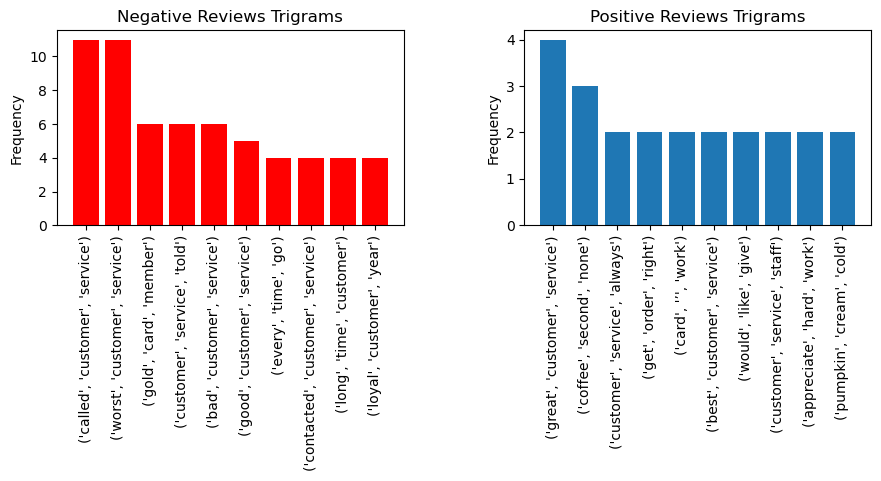

In [43]:
# Trigrams

trigrams1 = df_negative['trigrams'].tolist()
trigrams1 = list(chain(*trigrams1))
trigrams1_counts = Counter(trigrams1)

trigrams2 = df_positive['trigrams'].tolist()
trigrams2 = list(chain(*trigrams2))
trigrams2_counts = Counter(trigrams2)

plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
trigrams1x=list(map(str,(dict(trigrams1_counts.most_common(10)).keys())))
trigrams1y=list(dict(trigrams1_counts.most_common(10)).values())
plt.bar(trigrams1x,trigrams1y, color='red')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Negative Reviews Trigrams')

plt.subplot(1,2,2)
trigrams2x=list(map(str,(dict(trigrams2_counts.most_common(10)).keys())))
trigrams2y=list(dict(trigrams2_counts.most_common(10)).values())
plt.bar(trigrams2x,trigrams2y)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Positive Reviews Trigrams')

plt.tight_layout(pad=5.0)
plt.show()

Trigram analysis also shows similar results to bigrams, with customer service-related trigrams frequency exceeding other trigrams, followed by gold card member for negative reviews and coffee second none for positive reviews.

Now we can conclude that people relatively like the products (in this case, the coffee) but have a lot of bad experience with customer service and cards, especially gift cards. We will focus on these two elements.

<function matplotlib.pyplot.show(close=None, block=None)>

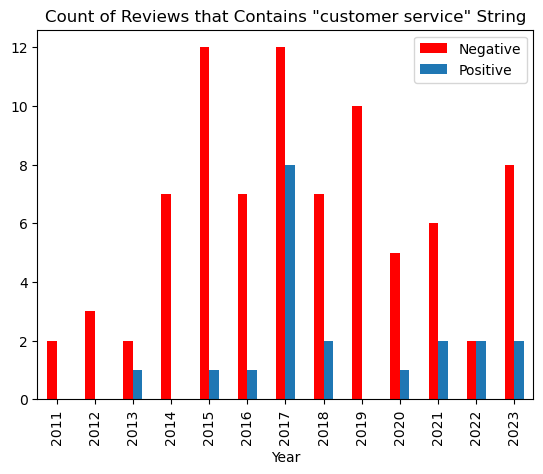

In [44]:
x1=df_negative[df_negative['Review'].str.contains('customer service')]['Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={"index": "year", 'Date': "count"})
x2=df_positive[df_positive['Review'].str.contains('customer service')]['Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={"index": "year", 'Date': "count"})
dfcs=pd.merge(x1,x2, how='left', on='year')
dfcs.columns=['Year','Negative','Positive']
dfcs.plot(x='Year',y=['Negative','Positive'], color=['r','tab:blue'],kind='bar')
plt.title('Count of Reviews that Contains "customer service" String')
plt.show

Bad customer service reviews peaked around 2015 and 2017. Since then, there's a declining trend but increased again in 2023. 

Another interesting thing is that during the 2017 period, positive customer service reviews also reached their peak. It is certainly contributing to an overall better average rating, as shown in the earlier graph.

We will go for the negative customer service review first. We will conduct further analysis focused on determining the main cause of the negative customer service experience.

In [45]:
df_negative_cs=df_negative[['name','location','State','Date','Rating','Review','prep5']][df_negative['Review'].str.contains('customer service')]
df_positive_cs=df_positive[['name','location','State','Date','Rating','Review','prep5']][df_positive['Review'].str.contains('customer service')]

In [46]:
# Exclude customer service

def remove_stopwords2(text):
    stop_words= stopwords.words('english')
    stop_words.extend(["starbucks",'customer','service'])
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [47]:
df_negative_cs['prep6_2']=df_negative_cs['prep5'].apply(remove_stopwords2)
df_negative_cs['lemma_2']=df_negative_cs['prep6_2'].apply(word_net_lemma)
df_negative_cs['bigrams_2'] = df_negative_cs['lemma_2'].map(lambda x: find_ngrams(x.split(" "), 2))

df_positive_cs['prep6_2']=df_positive_cs['prep5'].apply(remove_stopwords2)
df_positive_cs['lemma_2']=df_positive_cs['prep6_2'].apply(word_net_lemma)
df_positive_cs['bigrams_2'] = df_positive_cs['lemma_2'].map(lambda x: find_ngrams(x.split(" "), 2))

Text(0.5, 1.0, 'Positive Reviews Customer Service')

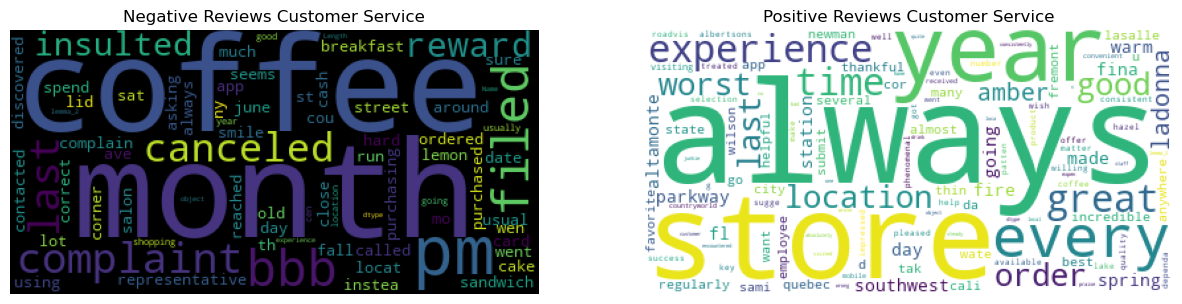

In [48]:
# Word Cloud

plt.figure(figsize=(15, 12))

plt.subplot(1,2,1)
word_cloud3= WordCloud().generate(str(df_negative_cs['lemma_2']))
plot_cloud(word_cloud3)
plt.title('Negative Reviews Customer Service')

plt.subplot(1,2,2)
word_cloud4= WordCloud(background_color='white').generate(str(df_positive_cs['lemma_2']))
plot_cloud(word_cloud4)
plt.title('Positive Reviews Customer Service')

Text(0.5, 1.0, 'Positive Reviews Customer Service')

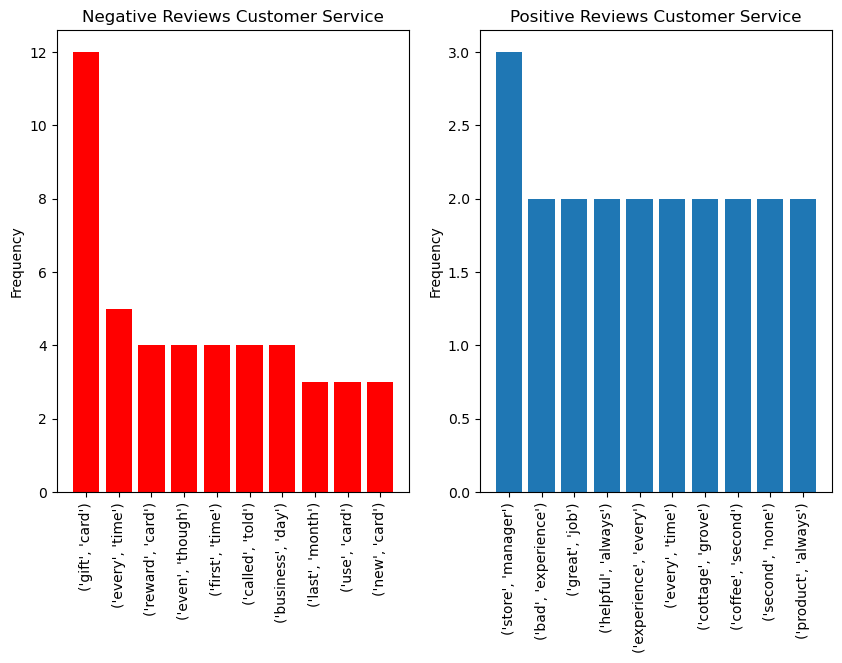

In [49]:
# Bigrams

bigrams3 = df_negative_cs['bigrams_2'].tolist()
bigrams3 = list(chain(*bigrams3))
bigrams3_counts = Counter(bigrams3)

bigrams4 = df_positive_cs['bigrams_2'].tolist()
bigrams4 = list(chain(*bigrams4))
bigrams4_counts = Counter(bigrams4)

plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
bigrams3x=list(map(str,(dict(bigrams3_counts.most_common(10)).keys())))
bigrams3y=list(dict(bigrams3_counts.most_common(10)).values())
plt.bar(bigrams3x,bigrams3y, color='red')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Negative Reviews Customer Service')

plt.subplot(1,2,2)
bigrams4x=list(map(str,(dict(bigrams4_counts.most_common(10)).keys())))
bigrams4y=list(dict(bigrams4_counts.most_common(10)).values())
plt.bar(bigrams4x,bigrams4y)
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Positive Reviews Customer Service')

The word cloud shows coffee, but that didn't appear in the negative bigrams chart.

The bigram chart indicates that gift cards are the primary cause of negative customer service reviews. Additionally, other cards, like reward cards, are also causing complaints. Addressing these card issues should be Starbucks' top priority.

On the other hand, the positive reviews highlight a range of impressions, such as "always helpful" and "great."

<function matplotlib.pyplot.show(close=None, block=None)>

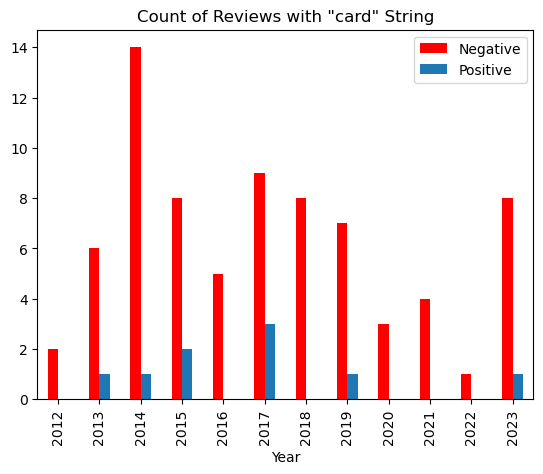

In [50]:
x3=df_negative[df_negative['Review'].str.contains('card')]['Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={"index": "year", 'Date': "count"})
x4=df_positive[df_positive['Review'].str.contains('card')]['Date'].dt.year.value_counts().sort_index().reset_index().rename(columns={"index": "year", 'Date': "count"})
dfcs=pd.merge(x3,x4, how='left', on='year')
dfcs.columns=['Year','Negative','Positive']
dfcs.plot(x='Year',y=['Negative','Positive'], color=['r','tab:blue'],kind='bar')
plt.title('Count of Reviews with "card" String')
plt.show

The amount of card-related negative reviews actually peaked in 2014 and has been decreasing ever since. But the problem still persists, and there is an increase in the 2023 period.

In [51]:
df_negative_ca=df_negative[['name','location','State','Date','Rating','Review','prep5']][df_negative['Review'].str.contains('card')]
df_positive_ca=df_positive[['name','location','State','Date','Rating','Review','prep5']][df_positive['Review'].str.contains('card')]

In [52]:
def remove_stopwords3(text):
    stop_words= stopwords.words('english')
    stop_words.extend(["starbucks",'customer','service','card'])
    return ' '.join(c for c in nltk.word_tokenize(text) if c not in stop_words)

In [53]:
df_negative_ca['prep6_2']=df_negative_ca['prep5'].apply(remove_stopwords3)
df_negative_ca['lemma_2']=df_negative_ca['prep6_2'].apply(word_net_lemma)
df_negative_ca['bigrams_2'] = df_negative_ca['lemma_2'].map(lambda x: find_ngrams(x.split(" "), 2))

df_positive_ca['prep6_2']=df_positive_ca['prep5'].apply(remove_stopwords3)
df_positive_ca['lemma_2']=df_positive_ca['prep6_2'].apply(word_net_lemma)
df_positive_ca['bigrams_2'] = df_positive_ca['lemma_2'].map(lambda x: find_ngrams(x.split(" "), 2))

Text(0.5, 1.0, 'Positive Reviews Card')

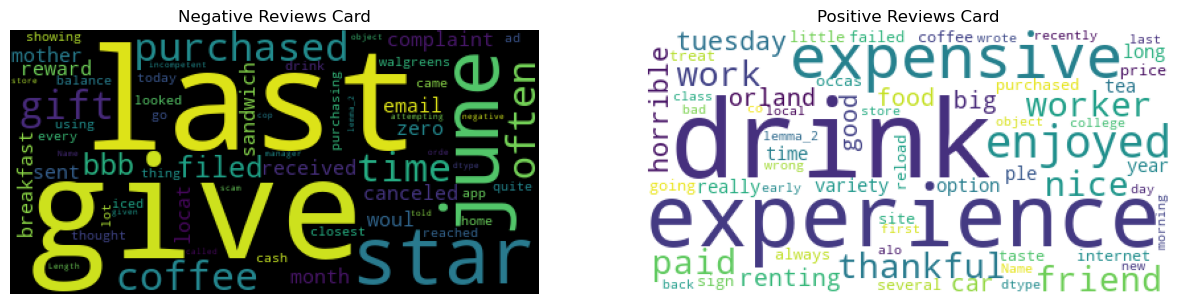

In [54]:
# Word Cloud

plt.figure(figsize=(15, 12))

plt.subplot(1,2,1)
word_cloud5= WordCloud().generate(str(df_negative_ca['lemma_2']))
plot_cloud(word_cloud5)
plt.title('Negative Reviews Card')

plt.subplot(1,2,2)
word_cloud6= WordCloud(background_color='white').generate(str(df_positive_ca['lemma_2']))
plot_cloud(word_cloud6)
plt.title('Positive Reviews Card')

In [55]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
df_negative_ca[['Date','State','Rating','Review']]

,Date,State,Rating,Review
10,2023-07-27,CA,1.0,"I filed a BBB complaint last month because Starbucks canceled my Starbucks Reward cards. I couldn't remember the balances, so I guessed about $9. Starbucks played nothing but games and tried everything they could to avoid responding to the complaint. I received a couple of phone call messages asking me to contact them directly and discuss the matter. The number provided was the customer service number and when I spoke with one representative, Linda hung up the phone on me. I did not use my card since 2012 which is my prerogative. Because of this and other reasons, Starbucks decided to close my Starbucks account. I reopened one about a few weeks ago and added a new card that I have not used yet."
13,2023-07-16,HI,1.0,"I would give Starbucks zero stars if I could. I received an email that I would be receiving a birthday reward on the day of my birthday and it would be good on the day of my birthday only. The email also stated that the reward would be for any drink or food item. I went to an Starbucks near my home. The cashier told me my coupon had expired. I told her I don't have a coupon. Its a birthday reward. I ordered a sandwich. The cashier said I could only purchase a drink. I showed her the email. She said, let's try it and swiped my card. She said it didn't take so she asked if I wanted a drink. I told her to just give me a venti hot coffee. She swiped my card again and said it didn't work. Then she asked, ""Are you sure it's your birthday?"" I showed her the email that said in big letters, 7/15. I told her this is July 15 and this is my birthday."
14,2023-07-06,NJ,1.0,"On June 21, 2023 I purchased coffee and a breakfast sandwich for $8.10 at the Starbucks located at the Target store in Mays Landing, N.J. I was not given purchase credit and “star” points for the purchase even though the cashier there scanned my Starbucks app. I reported this to customer service the next day and was told to email them a copy of my credit card receipt to their customer service address, which I did. I have still not been given stars to my account or credit for this purchase. I have attempted to contact them on multiple occasions and they have not responded."
15,2023-07-06,GA,1.0,"My mother sent me a $15 gift card purchased from Walgreens in June. She came to visit me this past weekend and brought the Gift card receipts. I contacted Walgreens to replace the cards. I was told to contact the Merchant (Starbucks). I called Starbucks and spoke with a representative today, explained my problem. He asked for the card number. When I provided it, he transferred me to a different department that handles these issues. I got another representative. I told this representative why I was transferred over. She got silent and ended the call. It is like no one wants to handle issues or do their job."
18,2023-06-03,GA,1.0,I have been purchasing Starbucks a lot using my cash app card. I reached out to Starbucks customer service so they could add my purchases or receipts to my account for points. I emailed them and received an automated email back saying someone will reach out to me. No one has as of yet. I sent out another email and still didn't get any assistance. Starbucks is ignoring me about receiving help
22,2023-05-11,CA,1.0,"I received a gift card on 4/20/2023 but not able to use it today, 5/11/2023. I believe no one should purchase Starbucks gift card anymore, because this is the 2nd time I was not able to use a Starbucks gift card...the first time was a thank-you card from the coordinator of our church's Foster the City program; all of us ""support friends"" helping out the foster families with various tasks received a card but it turned out we were all told not to use it because for reasons unbeknownst to him the cards were invalid. Sadly it happened—again...this time I received a card from a trusted friend and the same happened. I already texted her and let her know what had happened. I'm having a bad 

Let's review all the card-related negative feedback. Some complaints were about products later refunded via gift cards, but most were about issues with the cards themselves.

Earlier complaints focused on card availability, being charged twice, incorrect balances, etc. While these issues have decreased significantly, new problems have emerged, like customers not receiving reward points.

The company has addressed some of these issues on their website (https://www.starbucks.com/terms/manage-gift-cards/), but the information is presented as a lengthy, unappealing wall of text.

# Afterword

These Starbucks locations have consistently received poor ratings, largely due to bad customer service and card-related issues.

To improve these ratings, Starbucks should focus on the following actions:

1. Train customer service staff to handle technical problems, especially payment and card issues, while maintaining a helpful attitude, as some customers have appreciated.
2. Make the terms and conditions more visually appealing so that customers can easily read and understand them. For example, use bullet points, bold key sentences and numbers, and "do's and don'ts.".
3. Enhance card availability, as several customers have complained about being unable to use their cards.